<a href="https://colab.research.google.com/github/FCU-IECS-22/Colab/blob/main/Stock_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
df = pd.read_csv('2303.csv')

In [ ]:
df

,Date,Trade Volume,Trade Value,Opening Price,Highest Price,Lowest Price,Closing Price,Change,Transaction
0,100104,30268635,515087575,17.2,17.20,16.80,17.0,-0.2,5747
1,100105,65133854,1119637425,17.2,17.35,17.05,17.2,0.2,10198
2,100106,145046936,2591783318,17.2,18.40,17.15,18.4,1.2,24535
3,100107,137964451,2586911933,18.6,19.10,18.40,18.4,0.0,24566
4,100108,58947013,1068332609,18.4,18.45,17.85,18.2,-0.2,11053
...,...,...,...,...,...,...,...,...,...
2843,210726,137792338,7429437189,54.0,54.40,53.60,53.7,1.0,42572
2844,210727,118561484,6355294561,54.2,54.30,53.10,53.1,-0.6,35962
2845,210728,199999316,10261061610,52.4,52.60,50.50,51.8,-1.3,68871
2846,210729,437075578,23760926840,53.9,55.00,53.30,54.6,2.8,132593


In [ ]:
df = df[2460:2705] #2020-01~12月底

In [ ]:
#將資料型態轉為float(number)
df['Closing Price'] = pd.to_numeric(df['Closing Price'], errors='coerce')
df['Highest Price'] = pd.to_numeric(df['Highest Price'], errors='coerce')
df['Lowest Price'] = pd.to_numeric(df['Lowest Price'], errors='coerce')
df['Opening Price'] = pd.to_numeric(df['Opening Price'], errors='coerce')

In [ ]:
#2020年
df_close = df.iloc[:,6:7] #要預測的資料為收盤價
train_set = df_close[:200].values #前200筆用作訓練
test_set = df_close[200:].values #200筆以後用作測試
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (200, 1)
Test size: (45, 1)


In [ ]:
#近10年
df_close = df.iloc[:,6:7]
train_set = df_close[:2200].values
test_set = df_close[2200:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (2200, 1)
Test size: (648, 1)


In [ ]:
df_close

,Closing Price
2460,16.65
2461,16.55
2462,16.70
2463,16.55
2464,16.45
...,...
2700,45.85
2701,47.45
2702,45.70
2703,46.10


In [ ]:
df_date = pd.to_datetime(df['Date'], format='%y%m%d') #將 Date 轉為 pd 的 datetime 格式

In [ ]:
df_date

2460   2019-12-25
2461   2019-12-26
2462   2019-12-27
2463   2019-12-30
2464   2019-12-31
          ...    
2700   2020-12-18
2701   2020-12-21
2702   2020-12-22
2703   2020-12-23
2704   2020-12-24
Name: Date, Length: 245, dtype: datetime64[ns]

In [ ]:
df.dtypes

Date               int64
Trade Volume       int64
Trade Value        int64
Opening Price    float64
Highest Price    float64
Lowest Price     float64
Closing Price    float64
Change           float64
Transaction        int64
dtype: object

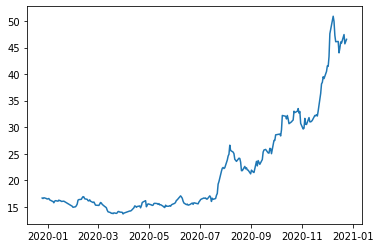

In [ ]:
#繪圖(收盤價)
plt.plot_date(df_date, df_close,fmt='-')

In [ ]:
model = MinMaxScaler()
train_set_scaled = model.fit_transform(train_set)

In [ ]:
train_set_scaled

array([[0.15503876],
       [0.1498708 ],
       [0.15762274],
       [0.1498708 ],
       [0.14470284],
       [0.1498708 ],
       [0.1369509 ],
       [0.12403101],
       [0.12144703],
       [0.10852713],
       [0.12403101],
       [0.12919897],
       [0.12403101],
       [0.13436693],
       [0.12919897],
       [0.12919897],
       [0.12144703],
       [0.12403101],
       [0.0749354 ],
       [0.06459948],
       [0.06976744],
       [0.08010336],
       [0.09560724],
       [0.13436693],
       [0.13953488],
       [0.14211886],
       [0.15762274],
       [0.16795866],
       [0.16537468],
       [0.14728682],
       [0.14211886],
       [0.12919897],
       [0.12661499],
       [0.1369509 ],
       [0.12403101],
       [0.11111111],
       [0.11627907],
       [0.10077519],
       [0.08527132],
       [0.08268734],
       [0.09560724],
       [0.11111111],
       [0.10594315],
       [0.09302326],
       [0.07235142],
       [0.06718346],
       [0.05943152],
       [0.036

In [ ]:
len(train_set_scaled)

200

In [ ]:
x_train = []
y_train = []
for i in range(60,200): #以前60筆資料預測下一筆
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
# 轉換成模型要求的維度
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
# LSTM訓練
reg = Sequential()
reg.add(LSTM(units = 50,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))
reg.add(Dense(units = 1))
reg.compile(optimizer = 'adam',loss='mean_squared_error')

In [ ]:
reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
reg.fit(x_train,y_train, epochs=20, batch_size =1,verbose=2)

Epoch 1/20
140/140 - 28s - loss: 0.0280
Epoch 2/20
140/140 - 6s - loss: 0.0178
Epoch 3/20
140/140 - 6s - loss: 0.0231
Epoch 4/20
140/140 - 6s - loss: 0.0178
Epoch 5/20
140/140 - 6s - loss: 0.0111
Epoch 6/20
140/140 - 6s - loss: 0.0098
Epoch 7/20
140/140 - 6s - loss: 0.0088
Epoch 8/20
140/140 - 6s - loss: 0.0083
Epoch 9/20
140/140 - 6s - loss: 0.0125
Epoch 10/20
140/140 - 6s - loss: 0.0080
Epoch 11/20
140/140 - 6s - loss: 0.0068
Epoch 12/20
140/140 - 6s - loss: 0.0077
Epoch 13/20
140/140 - 6s - loss: 0.0052
Epoch 14/20
140/140 - 6s - loss: 0.0079
Epoch 15/20
140/140 - 6s - loss: 0.0091
Epoch 16/20
140/140 - 6s - loss: 0.0054
Epoch 17/20
140/140 - 6s - loss: 0.0043
Epoch 18/20
140/140 - 6s - loss: 0.0060
Epoch 19/20
140/140 - 6s - loss: 0.0059
Epoch 20/20
140/140 - 6s - loss: 0.0062


In [ ]:
len(df_close)

245

In [ ]:
len(test_set)

45

In [ ]:
input = df_close[len(df_close)-len(test_set)-60:].values
input = model.transform(input)

In [ ]:
len(input)

105

In [ ]:
x_test = []
for i in range(60,105):
    x_test.append(input[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(45, 60, 1)

In [ ]:
len(x_test)

45

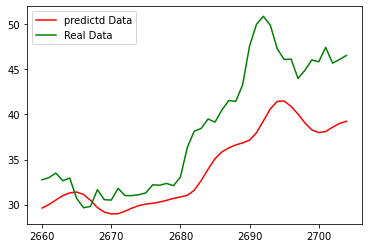

In [ ]:
pred = reg.predict(x_test)
pred = model.inverse_transform(pred)
df.loc[2660:2705, 'pred'] = pred
df['pred'][200:].plot(color="red",label='predictd Data')
df['Closing Price'][200:].plot(color="green",label='Real Data')
plt.legend(loc='best')

In [ ]:
df.loc[2660:2705, 'pred']

2660    29.619913
2661    30.011955
2662    30.508249
2663    31.001888
2664    31.298815
2665    31.398306
2666    31.123108
2667    30.474436
2668    29.682137
2669    29.169121
2670    28.967903
2671    28.992821
2672    29.270460
2673    29.616484
2674    29.893341
2675    30.059097
2676    30.145864
2677    30.281805
2678    30.473757
2679    30.691736
2680    30.853643
2681    31.028776
2682    31.588671
2683    32.661785
2684    33.929619
2685    35.088997
2686    35.844219
2687    36.294670
2688    36.622894
2689    36.843521
2690    37.151505
2691    37.977028
2692    39.287937
2693    40.622902
2694    41.457047
2695    41.496418
2696    40.898792
2697    40.051022
2698    39.069256
2699    38.291531
2700    37.992447
2701    38.102257
2702    38.587666
2703    39.005619
2704    39.244778
Name: pred, dtype: float64